In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.plotly as py
#import plotly.graph_objs as go
import seaborn as sns
sns.set()

In [13]:
%matplotlib inline

In [14]:
data = pd.read_csv("/Users/Stacy/Documents/WebDevelopment/projects/sexualAssault_datasets/2010-2018_sexcrimes_violentcrimes.csv")
data = pd.DataFrame(data)

In [15]:
data.columns = ['cad_num', 'event_clearing', 'call_type', 'priority', 
                'initial_call_type', 'final_call_type', 'original_time_queued',
               'arrived_time', 'precinct', 'sector', 'beat']

In [16]:
data.head(5)

,cad_num,event_clearing,call_type,priority,initial_call_type,final_call_type,original_time_queued,arrived_time,precinct,sector,beat
0,2010000066820,ASSISTANCE RENDERED,911,2,MENTAL - PERSON OR PICKUP/TRANSPORT,--SEX OFFENSES (NON-RAPE) - LEWD CONDUCT,02/27/2010 10:54:25 PM,Feb 27 2010 10:55:45:000PM,NORTH,UNION,U1
1,2010000000327,PHYSICAL ARREST MADE,911,1,ASLT - IP/JO - WITH OR W/O WPNS (NO SHOOTINGS),--ASSAULTS - FIREARM INVOLVED,01/01/2010 03:13:06 AM,Jan 1 2010 03:14:51:000AM,SOUTH,ROBERT,R3
2,2010000000451,REPORT WRITTEN (NO ARREST),911,2,THEFT OF SERVICES,--ROBBERY - ARMED,01/01/2010 05:46:54 AM,Jan 1 2010 06:39:35:000AM,NORTH,UNION,U1
3,2010000000466,REPORT WRITTEN (NO ARREST),"TELEPHONE OTHER, NOT 911",3,RAPE,--RAPE - KNOWN SUSPECT (ACQUAINTANCE),01/01/2010 06:28:49 AM,Jan 1 2010 06:40:09:000AM,EAST,GEORGE,G1
4,2010000000776,REPORT WRITTEN (NO ARREST),911,3,RAPE,--RAPE - KNOWN SUSPECT (ACQUAINTANCE),01/01/2010 03:05:57 PM,Jan 1 2010 03:12:26:000PM,SOUTHWEST,FRANK,F3


In [17]:
data.dtypes

cad_num                  int64
event_clearing          object
call_type               object
priority                 int64
initial_call_type       object
final_call_type         object
original_time_queued    object
arrived_time            object
precinct                object
sector                  object
beat                    object
dtype: object

## To Do
**Cleaning:**
* Clean out extra precinct values (one is 'unknown')
* Review if I need to delete rows with null sector value

**Calculations:**
* Add col for delta between time queued and time arrived.

In [18]:
# Change original_time_queued to datetime
data['original_time_queued'] = pd.to_datetime(data.original_time_queued)

In [19]:
# Change arrived_time to datetime
data['arrived_time'] = pd.to_datetime(data.arrived_time, format='%b %d %Y %I:%M:%S:%f%p')

In [20]:
data.count()

cad_num                 21202
event_clearing          21202
call_type               21202
priority                21202
initial_call_type       21202
final_call_type         21202
original_time_queued    21202
arrived_time            21202
precinct                21202
sector                  20590
beat                    21202
dtype: int64

In [21]:
data[pd.isnull(data).any(axis=1)]

,cad_num,event_clearing,call_type,priority,initial_call_type,final_call_type,original_time_queued,arrived_time,precinct,sector,beat
13,2010000002185,REPORT WRITTEN (NO ARREST),"TELEPHONE OTHER, NOT 911",2,ROBBERY (INCLUDES STRONG ARM),--ROBBERY - ARMED,2010-01-02 23:17:25,2010-01-02 23:46:25,UNKNOWN,NaN,99
33,2010000006111,ASSISTANCE RENDERED,"TELEPHONE OTHER, NOT 911",2,NARCOTICS WARRANT SERVICE,--ROBBERY - ARMED,2010-01-06 13:53:13,1900-01-01 00:00:00,UNKNOWN,NaN,INV
78,2010000014675,UNABLE TO LOCATE INCIDENT OR COMPLAINANT,ONVIEW,3,FOLLOW UP,--ASSAULTS - FIREARM INVOLVED,2010-01-13 21:48:50,2010-01-13 21:48:50,UNKNOWN,NaN,LAPT
79,2010000014715,UNABLE TO LOCATE INCIDENT OR COMPLAINANT,ONVIEW,3,FOLLOW UP,--ASSAULTS - FIREARM INVOLVED,2010-01-13 22:24:19,2010-01-13 22:24:19,UNKNOWN,NaN,LAPT
135,2010000029844,REPORT WRITTEN (NO ARREST),"TELEPHONE OTHER, NOT 911",3,"CHILD - ABAND, ABUSED, MOLESTED, NEGLECTED",--RAPE - KNOWN SUSPECT (ACQUAINTANCE),2010-01-26 19:48:36,2010-01-26 20:21:48,UNKNOWN,NaN,S
151,2010000032182,FOLLOW-UP REPORT MADE,ONVIEW,3,FOLLOW UP,--ROBBERY - ARMED,2010-01-28 17:26:27,2010-01-28 17:26:27,UNKNOWN,NaN,DET
186,2010000039534,REPORT WRITTEN (NO ARREST),"TELEPHONE OTHER, NOT 911",1,ROBBERY - IP/JO (INCLUDES STRONG ARM),--ROBBERY - ARMED,2010-02-03 23:11:49,2010-02-03 23:16:57,UNKNOWN,NaN,99
194,2010000041720,FOLLOW-UP REPORT MADE,ONVIEW,9,-ASSIGNED DUTY - STAKEOUT,--ROBBERY - ARMED,2010-02-05 18:41:40,2010-02-05 18:41:40,UNKNOWN,NaN,CMD
200,2010000042965,FOLLOW-UP REPORT MADE,"TELEPHONE OTHER, NOT 911",9,-ASSIGNED DUTY - STAKEOUT,--ROBBERY - ARMED,2010-02-06 19:03:36,2010-02-06 19:05:23,UNKNOWN,NaN,S
230,2010000049883,FOLLOW-UP REPORT MADE,ONVIEW,3,FOLLOW UP,--ROBBERY - ARMED,2010-02-12 23:02:00,2010-02-12 23:02:00,UNKNOWN,NaN,99


In [27]:
precinct = data['precinct'].unique().tolist()
precinct

['NORTH', 'SOUTH', 'EAST', 'SOUTHWEST', 'WEST', 'UNKNOWN']

In [28]:
sector = data['sector'].unique().tolist()
sector

['UNION',
 'ROBERT',
 'GEORGE',
 'FRANK',
 'SAM',
 'DAVID',
 'EDWARD',
 'BOY',
 nan,
 'MARY',
 'NORA',
 'LINCOLN',
 'JOHN',
 'KING',
 'CHARLIE',
 'QUEEN',
 'WILLIAM',
 'OCEAN']

In [35]:
beat = data['beat'].unique().tolist()
beat

['U1',
 'R3',
 'G1',
 'F3',
 'S1',
 'S3',
 'D2',
 'E1',
 'D1',
 'B3',
 '99',
 'U2',
 'M1',
 'B2',
 'G2',
 'N3',
 'L2',
 'E3',
 'F2',
 'E2',
 'U3',
 'F1',
 'INV',
 'J1',
 'K3',
 'C2',
 'N1',
 'R1',
 'J3',
 'C3',
 'Q3',
 'L1',
 'R2',
 'N2',
 'M2',
 'B1',
 'Q2',
 'W2',
 'LAPT',
 'S2',
 'O3',
 'M3',
 'K1',
 'L3',
 'K2',
 'D3',
 'J2',
 'S',
 'DET',
 'O1',
 'O2',
 'W3',
 'Q1',
 'W1',
 'CMD',
 'CTY',
 'N',
 'G3',
 'C1',
 'CS',
 'CDD',
 'E',
 'WS',
 'US',
 'CC',
 'W',
 'TQ',
 'OS',
 'SWT',
 'NP',
 'COMM',
 'WP',
 'FS',
 'WD',
 'NS',
 'MS',
 'SD',
 'RS',
 'SS',
 'SPVDD',
 'ES']

In [44]:
sexual_assault_terms = 'CSEC|LEWD|MOLESTING|STRANGER|ACQUAINTANCE'
sexual_assault_terms

'CSEC|LEWD|MOLESTING|STRANGER|ACQUAINTANCE'

In [45]:
sexual_assault_mask = data['final_call_type'].str.contains(sexual_assault_terms)

stage = data[sexual_assault_mask]

In [46]:
stage.head()

,cad_num,event_clearing,call_type,priority,initial_call_type,final_call_type,original_time_queued,arrived_time,precinct,sector,beat
0,2010000066820,ASSISTANCE RENDERED,911,2,MENTAL - PERSON OR PICKUP/TRANSPORT,--SEX OFFENSES (NON-RAPE) - LEWD CONDUCT,2010-02-27 22:54:25,2010-02-27 22:55:45,NORTH,UNION,U1
3,2010000000466,REPORT WRITTEN (NO ARREST),"TELEPHONE OTHER, NOT 911",3,RAPE,--RAPE - KNOWN SUSPECT (ACQUAINTANCE),2010-01-01 06:28:49,2010-01-01 06:40:09,EAST,GEORGE,G1
4,2010000000776,REPORT WRITTEN (NO ARREST),911,3,RAPE,--RAPE - KNOWN SUSPECT (ACQUAINTANCE),2010-01-01 15:05:57,2010-01-01 15:12:26,SOUTHWEST,FRANK,F3
5,2010000000876,REPORT WRITTEN (NO ARREST),ONVIEW,3,RAPE,--RAPE - UNKNOWN SUSPECT (STRANGER),2010-01-01 17:28:02,2010-01-01 17:28:02,EAST,GEORGE,G1
8,2010000001201,ASSISTANCE RENDERED,911,2,"LEWD - (EXPOSING, FLASHING, URINATING IN PUB)",--SEX OFFENSES (NON-RAPE) - LEWD CONDUCT,2010-01-02 00:37:29,2010-01-02 00:42:16,WEST,DAVID,D2


KeyboardInterrupt: 

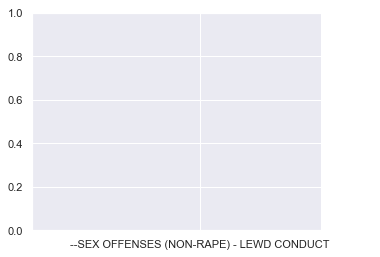

In [53]:
call_type = stage['final_call_type'].values
location = stage['precinct'].values

plt.hist(call_type)
plt.show()